In [1]:
# import bibliotek
from PIL import Image
from os import listdir
from os.path import splitext

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from skimage import color
from skimage import io


%matplotlib inline

## Zmiana rozszerzeń plików

In [17]:
# Tło
source_directory1 = 'D:/SF/LINIE/PLD_IR_VIS/TY_VL_2000_extra/TY_VL_2000_extra_jpg/'
#target_directory1 = 'D:/SF/LINIE/PLD_IR_VIS/TY_VL_2000_extra/TY_VL_2000_extra_jpg/'

#target = '.jpg'
base = '.bmp'
filename_bg_list = []

for file in listdir(source_directory1):
    filename1, extension1 = splitext(file)

    im = Image.open(source_directory1 + file)
    #im.save(target_directory1 + filename1 + target) #TY_VL_4001.jpg
    filename_bg_list.append(source_directory1 + file)

In [18]:
filename_bg_list[0]

'D:/SF/LINIE/PLD_IR_VIS/TY_VL_2000_extra/TY_VL_2000_extra_jpg/TY_VL_4001.jpg'

In [19]:
# Linie
source_directory2 = 'D:/SF/LINIE/PLD_IR_VIS/Power_Line_Database/Power_Line_Database/Visible_Light_jpg/'
#target_directory2 = 'D:/SF/LINIE/PLD_IR_VIS/Power_Line_Database/Power_Line_Database/Visible_Light_jpg/'

#target = '.jpg'
filename_ob_list = []

for file in listdir(source_directory2):
    filename2, extension2 = splitext(file)

    im = Image.open(source_directory2 + file)
    #im.save(target_directory2 + filename2 + target) #TV_VL_0001.jpg
    filename_ob_list.append(source_directory2 + file)

In [20]:
filename_ob_list[0]

'D:/SF/LINIE/PLD_IR_VIS/Power_Line_Database/Power_Line_Database/Visible_Light_jpg/TV_VL_0001.jpg'

## Utworzenie DataFrames ze ścieżką i klasą dla danych

In [21]:
# Data frame tło
df_bg = pd.DataFrame.from_dict({'path':filename_bg_list, 'is_line':0})
df_bg.shape


(2000, 2)

In [22]:
# Data frame obiekt
df_ob = pd.DataFrame.from_dict({'path':filename_ob_list, 'is_line':1})
df_ob.shape


(4000, 2)

In [23]:
# Połączenie data frames
df = pd.concat([df_bg,df_ob])
df.shape

(6000, 2)

In [24]:
df.reset_index(inplace=True)

In [25]:
df.head()

,index,path,is_line
0,0,D:/SF/LINIE/PLD_IR_VIS/TY_VL_2000_extra/TY_VL_...,0
1,1,D:/SF/LINIE/PLD_IR_VIS/TY_VL_2000_extra/TY_VL_...,0
2,2,D:/SF/LINIE/PLD_IR_VIS/TY_VL_2000_extra/TY_VL_...,0
3,3,D:/SF/LINIE/PLD_IR_VIS/TY_VL_2000_extra/TY_VL_...,0
4,4,D:/SF/LINIE/PLD_IR_VIS/TY_VL_2000_extra/TY_VL_...,0


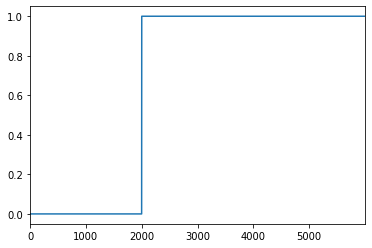

In [26]:
df['is_line'].plot()

## Podział danych na zbiór treningowy i testowy 

In [27]:
from skimage import data
from skimage.color import rgb2gray


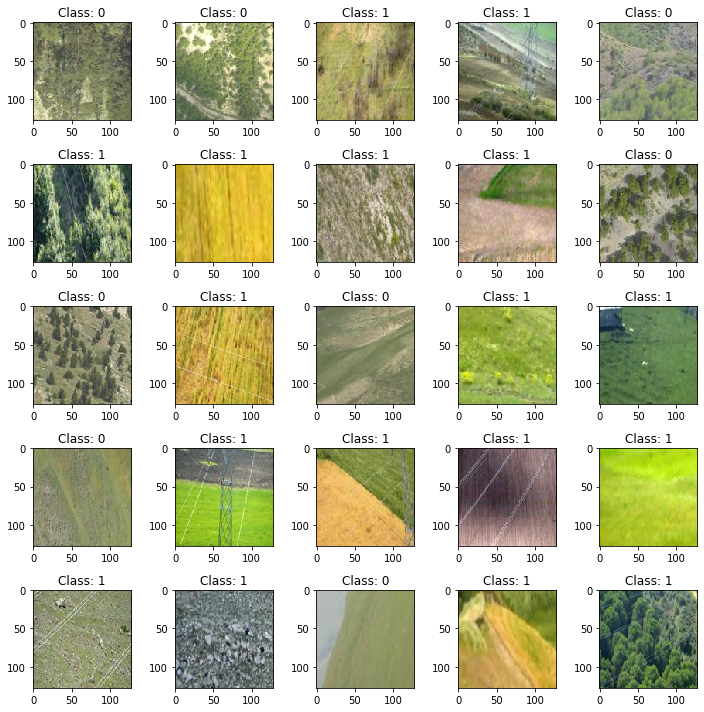

In [28]:
# wizualizacja 25 losowych zdjęć ze zbioru X_train

plt.figure(figsize=(10,10))

nr_img = np.random.randint(6000, size=(1, 25))

for idx in range(25):
    plt.subplot(5,5,idx+1)
    img = Image.open(df['path'][nr_img[0,idx]])
    #img = img.convert("L")
    #plt.imshow(img, cmap='Greys')
    plt.imshow(img)
    plt.title('Class: {}'.format(df['is_line'][nr_img[0,idx]]))# wyjściowa klasa 
    
plt.tight_layout()


In [30]:
# Utworzenie X, y
def loadImage(fname):
    return np.asarray(Image.open(fname))

X = [loadImage(fname) for fname in df['path']]
X = np.array(X)
y = np.array(df['is_line'])

In [31]:
# Rozmiar macierzy
print(X.shape)
print(y.shape)

(6000, 128, 128, 3)
(6000,)


In [32]:
# Zapis zdjęć i zmiennej docelowej
np.save('X.npy', X)
np.save('y.npy', y)